# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Import and Describe DataSet

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Exploratory Data Analysis (Plotting Missing Values)

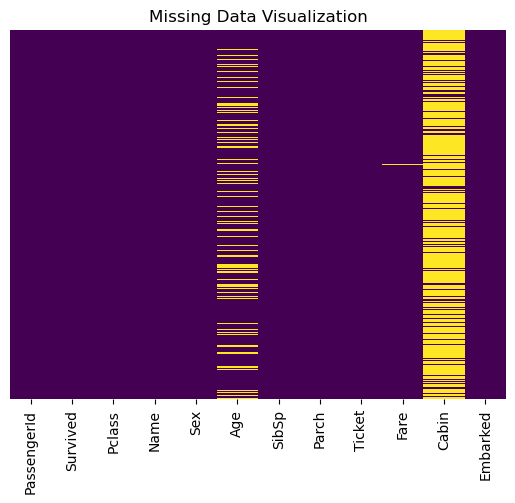

In [5]:
# Missing Data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

# Visualizing Survival

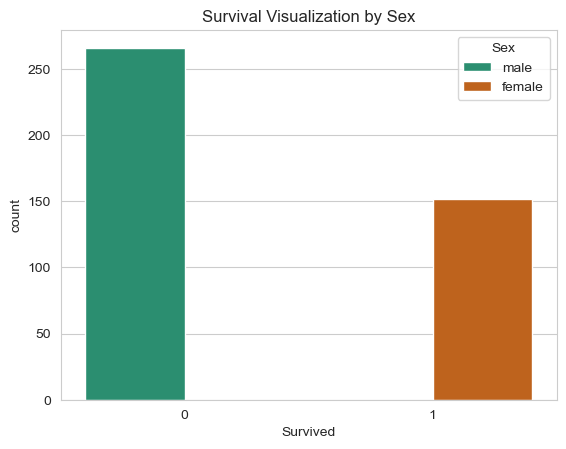

In [6]:
sns.set_style('whitegrid')
color_palette = 'Dark2'
sns.countplot(x='Survived', hue='Sex', data=df, palette=color_palette)
plt.title('Survival Visualization by Sex')
plt.legend(title='Sex', loc='upper right')
plt.show()

# Visualize survival based on passenger class

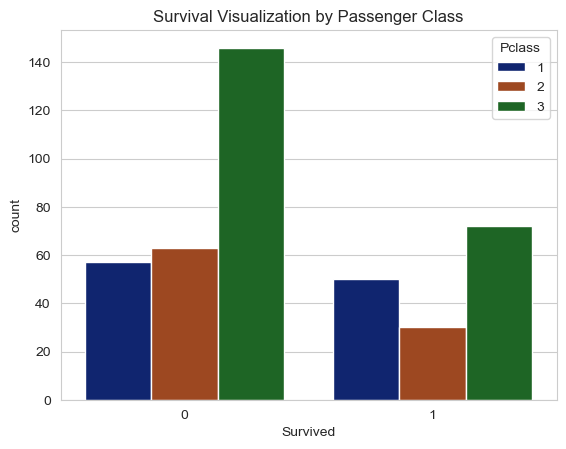

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df, palette='dark')
plt.title('Survival Visualization by Passenger Class')
plt.show()

# Distribution of Age

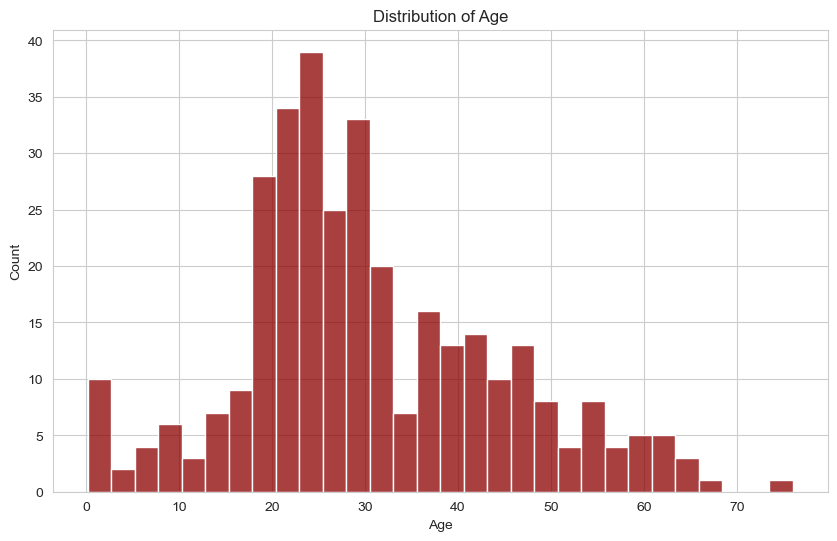

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Age'].dropna(), kde=False, color='darkred', bins=30)
plt.title('Distribution of Age')
plt.show()

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

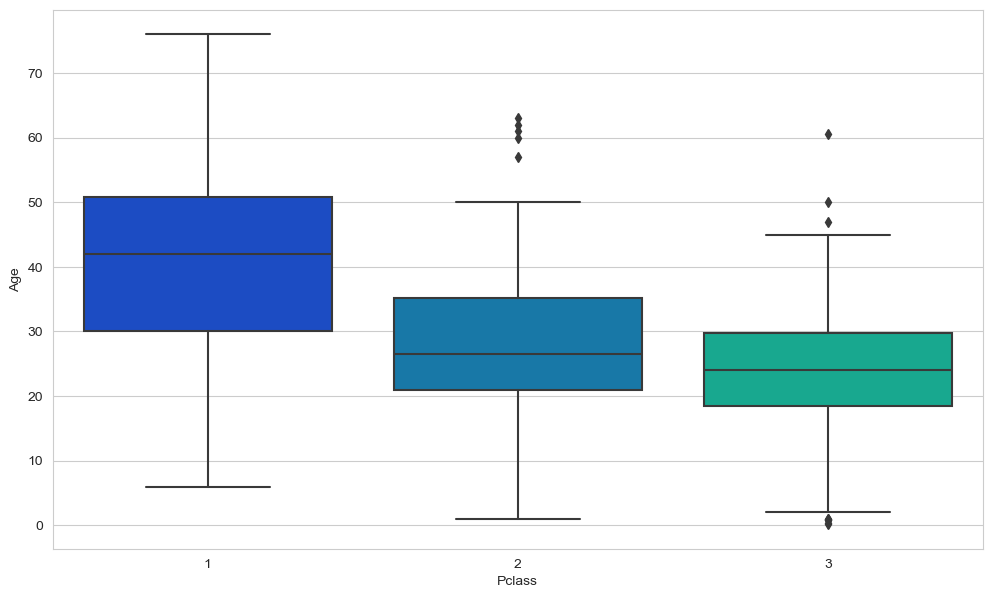

In [9]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

# Impute missing age based on passenger class

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [12]:
# Drop Cabin column and rows with missing Embarked data
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)

In [13]:
# Convert categorical features to dummy variables
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
df = pd.concat([df, sex, embark], axis=1)

# Building a Logistic Regression model

In [14]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1),
                                                    df['Survived'], test_size=0.30,
                                                    random_state=101)# Building a Logistic Regression model

In [15]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a Logistic Regression model

In [16]:
logmodel = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000
logmodel.fit(X_train_scaled, y_train)
predictions = logmodel.predict(X_test_scaled)

In [17]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        61

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [18]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# Coefficients of the logistic regression model to understand the impact of different features on survival

In [19]:
# Get the coefficients and corresponding feature names
coefficients = logmodel.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value to see the most impactful features
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top coefficients
print(coefficients_df.head())

# Interpretation
print("Interpretation:")
for index, row in coefficients_df.iterrows():
    if row['Coefficient'] > 0:
        print(f"A unit increase in {row['Feature']} increases the odds of survival.")
    else:
        print(f"A unit increase in {row['Feature']} decreases the odds of survival.")


  Feature  Coefficient  Absolute Coefficient
6    male    -3.925295              3.925295
7       Q     0.179504              0.179504
4   Parch     0.144030              0.144030
5    Fare     0.114668              0.114668
1  Pclass    -0.079162              0.079162
Interpretation:
A unit increase in male decreases the odds of survival.
A unit increase in Q increases the odds of survival.
A unit increase in Parch increases the odds of survival.
A unit increase in Fare increases the odds of survival.
A unit increase in Pclass decreases the odds of survival.
A unit increase in Age decreases the odds of survival.
A unit increase in SibSp increases the odds of survival.
A unit increase in PassengerId decreases the odds of survival.
A unit increase in S decreases the odds of survival.


# Plot Feature Coefficients

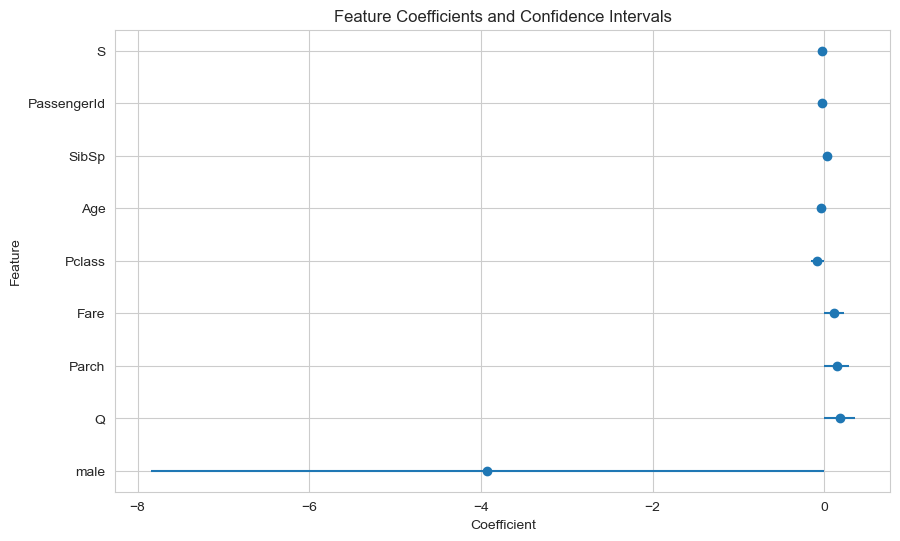

In [24]:
# Plot feature coefficients with confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(coefficients_df['Coefficient'], coefficients_df['Feature'], xerr=coefficients_df['Absolute Coefficient'], fmt='o')
plt.title('Feature Coefficients and Confidence Intervals')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


# ROC Curve and AUC

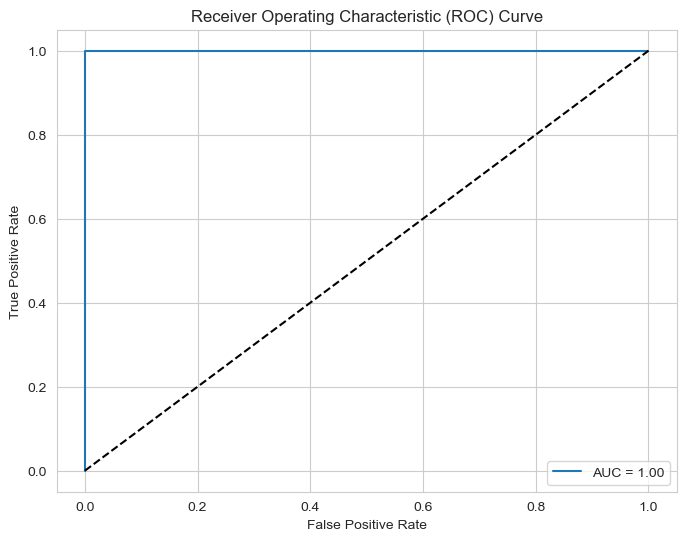

In [25]:
# Calculate predicted probabilities for the positive class
y_pred_prob = logmodel.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
